# Decision Tree Classifier

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# 1. Create DataFrame from Dataset
data = {
    'Company': ['Google', 'Google', 'Google', 'Google', 'Google', 'AbcPharma', 'AbcPharma', 'AbcPharma', 'AbcPharma', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'],
    'Job': ['Sale', 'Sale', 'Manager', 'Manager', 'Programmer', 'Sale', 'Programmer', 'Manager', 'Manager', 'Sale', 'Sale', 'Manager', 'Manager', 'Programmer', 'Programmer'],
    'Degree': ['Bachelors', 'Master', 'Bachelors', 'Master', 'Master', 'Master', 'Bachelors', 'Bachelors', 'Master', 'Bachelors', 'Master', 'Bachelors', 'Master', 'Bachelors', 'Master'],
    'Salary_100K': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# 2. Preprocessing
inputs = df.drop('Salary_100K', axis='columns')
target = df['Salary_100K']

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['Company_n'] = le_company.fit_transform(inputs['Company'])
inputs['Job_n'] = le_job.fit_transform(inputs['Job'])
inputs['Degree_n'] = le_degree.fit_transform(inputs['Degree'])

inputs_n = inputs.drop(['Company', 'Job', 'Degree'], axis='columns')

# 3. Train Model
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

# 4. Predictions (as requested in the sheet)
print("Prediction for input [0,0,0]:", model.predict([[0,0,0]]))
print("Prediction for input [0,0,1]:", model.predict([[0,0,1]]))
print("Prediction for input [1,1,1]:", model.predict([[1,1,1]]))

Prediction for input [0,0,0]: [0]
Prediction for input [0,0,1]: [0]
Prediction for input [1,1,1]: [1]


c:\Users\rajsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rajsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rajsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Plots

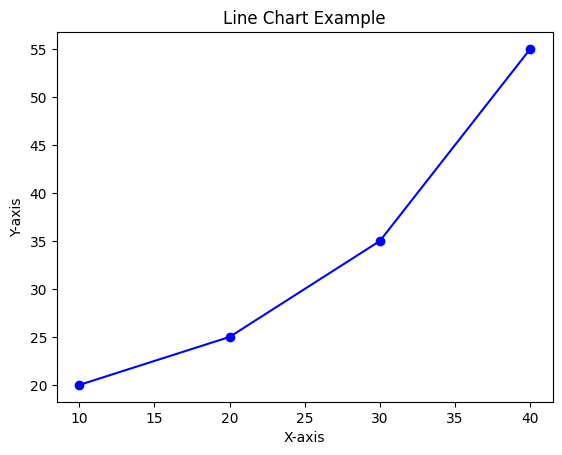

In [1]:
import matplotlib.pyplot as plt 
x = [10, 20, 30, 40] 
y = [20, 25, 35, 55] 
plt.plot(x, y, color='blue', marker='o') 
plt.title("Line Chart Example") 
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 
plt.show()

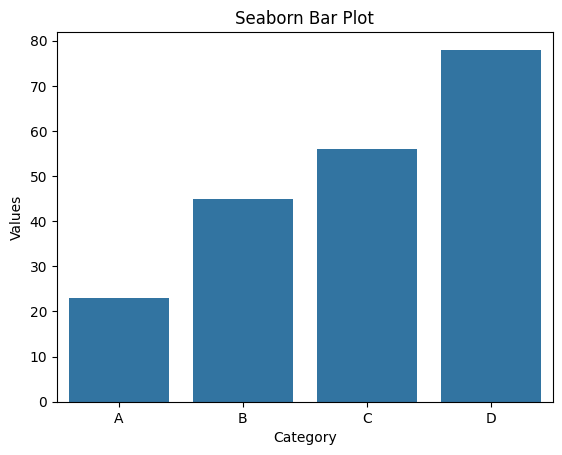

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
#Sample dataset 
data = pd.DataFrame({ 
'Category': ['A', 'B', 'C', 'D'], 
'Values': [23, 45, 56, 78] 
}) 
sns.barplot(x='Category', y='Values', data=data) 
plt.title("Seaborn Bar Plot") 
plt.show() 

In [4]:
import plotly.express as px
df = px.data.iris() 
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', title="Plotly Interactive Scatter Plot") 
fig.show() 

In [6]:
from bokeh.plotting import figure, show 
p = figure(title="Interactive Line Plot", x_axis_label='X', y_axis_label='Y') 
p.line([1, 2, 3, 4], [4, 7, 2, 5], line_width=2) 
show(p)

# Decision Tree

--- Small Play Tennis Dataset ---
    Outlook Humidity Play
0     Sunny     High   No
1  Overcast     High  Yes
2      Rain   Normal  Yes
3     Sunny   Normal  Yes
4      Rain     High   No
5  Overcast   Normal  Yes




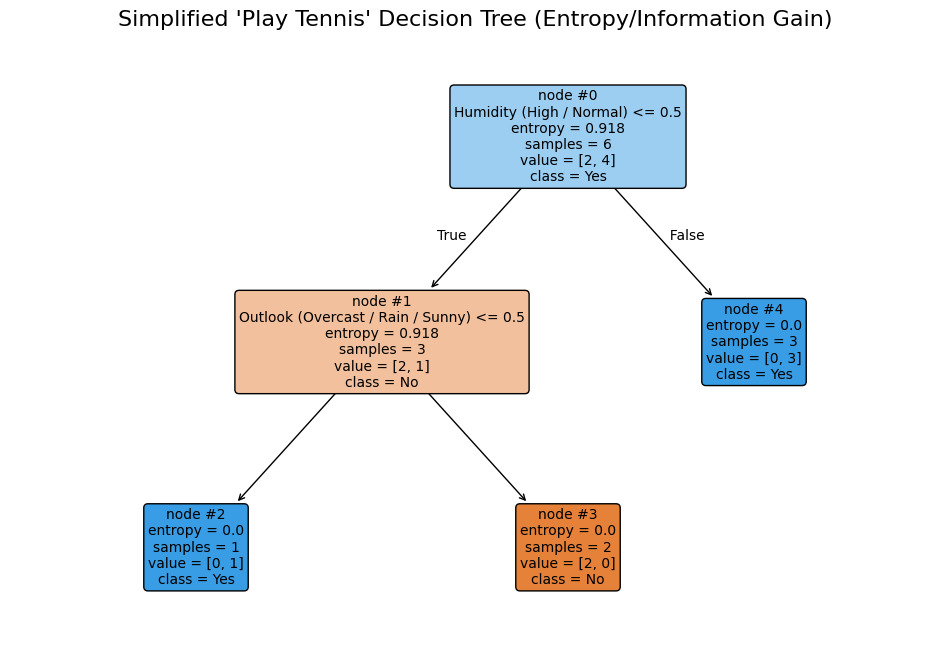

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Define the SMALL "Play Tennis" Dataset
data = {
    'Outlook': ['Sunny','Overcast','Rain','Sunny','Rain','Overcast'],
    'Humidity': ['High','High','Normal','Normal','High','Normal'],
    'Play': ['No','Yes','Yes','Yes','No','Yes']
}
df_small = pd.DataFrame(data)

print("--- Small Play Tennis Dataset ---")
print(df_small)
print("\n" + "="*40 + "\n")

# 2. Encode Categorical Data
encoders = {}
df_encoded = df_small.copy()

for col in df_small.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_small[col])
    encoders[col] = le # Store encoder for clarity in class_names and feature_names

X_small = df_encoded.drop('Play', axis=1)
y_small = df_encoded['Play']

# 3. Train the Decision Tree Model (using Entropy for Information Gain)
# max_depth=3 ensures the tree doesn't get too complex for this small dataset
clf_small = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
clf_small.fit(X_small, y_small)

# 4. Generate the Clear Visualization
plt.figure(figsize=(12, 8)) # Larger figure for better readability
plot_tree(clf_small, 
          feature_names=[f"{col} ({' / '.join(encoders[col].classes_)})" for col in X_small.columns], # Show original labels
          class_names=encoders['Play'].classes_, # 'No', 'Yes'
          filled=True, 
          rounded=True,
          fontsize=10,
          impurity=True, # Show the entropy value in each node
          node_ids=True, # Show node IDs for easy reference
          proportion=False, # Show absolute counts instead of proportions
          label='all') # Show all labels including criteria

plt.title("Simplified 'Play Tennis' Decision Tree (Entropy/Information Gain)", fontsize=16)
plt.show()